In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('Earthquakes_database.csv')
print(data)

             Date      Time  Latitude  Longitude        Type   Depth  \
0        1/2/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1        1/4/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2        1/5/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3        1/8/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4        1/9/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
36259  12/28/2016   8:22:12   38.3917  -118.8941  Earthquake   12.30   
36260  12/28/2016   9:13:47   38.3777  -118.8957  Earthquake    8.80   
36261  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
36262  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
36263  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error Depth Seismic Stations Magnitude Magnitude Type  ...  \
0              NaN                    NaN         6         

<ipython-input-51-4fbb2ac2da0a>:1: DtypeWarning: Columns (7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Earthquakes_database.csv')


In [52]:
data = data.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square'], axis=1)
print(data)

             Date      Time  Latitude  Longitude        Type   Depth  \
0        1/2/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1        1/4/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2        1/5/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3        1/8/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4        1/9/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
36259  12/28/2016   8:22:12   38.3917  -118.8941  Earthquake   12.30   
36260  12/28/2016   9:13:47   38.3777  -118.8957  Earthquake    8.80   
36261  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
36262  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
36263  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

      Magnitude Magnitude Type            ID  Source Location Source  \
0             6             MW  ISCGEM860706  ISCGEM          I

In [53]:
data = data.fillna(0)
print(data)

             Date      Time  Latitude  Longitude        Type   Depth  \
0        1/2/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1        1/4/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2        1/5/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3        1/8/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4        1/9/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
36259  12/28/2016   8:22:12   38.3917  -118.8941  Earthquake   12.30   
36260  12/28/2016   9:13:47   38.3777  -118.8957  Earthquake    8.80   
36261  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
36262  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
36263  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

      Magnitude Magnitude Type            ID  Source Location Source  \
0             6             MW  ISCGEM860706  ISCGEM          I

In [57]:
data['Magnitude'] = pd.to_numeric(data['Magnitude'], errors='coerce')

bins = [0, 4, 6, 8, np.inf]
labels = ['Minor', 'Light', 'Moderate', 'Major']
data['Magnitude_Category'] = pd.cut(data['Magnitude'], bins=bins, labels=labels)

In [58]:
melted_data = pd.melt(data, id_vars=['ID'], value_vars=['Latitude', 'Longitude', 'Magnitude'])
print(melted_data)

                  ID   variable   value
0       ISCGEM860706   Latitude  19.246
1       ISCGEM860737   Latitude   1.863
2       ISCGEM860762   Latitude -20.579
3       ISCGEM860856   Latitude -59.076
4       ISCGEM860890   Latitude  11.938
...              ...        ...     ...
108787    NN00570710  Magnitude   5.600
108788    NN00570744  Magnitude   5.500
108789    US10007NAF  Magnitude   5.900
108790    US10007NL0  Magnitude   6.300
108791    US10007NTD  Magnitude   5.500

[108792 rows x 3 columns]


In [60]:
data['New_Index'] = data.groupby('ID').cumcount()

pivoted_data = data.pivot(index=['ID', 'New_Index'], columns='Type', values='Magnitude')
print(pivoted_data)

Type                   0  Earthquake  Explosion  Nuclear Explosion  Rock Burst
ID         New_Index                                                          
0          0         NaN         NaN        NaN                NaN         NaN
AK11232962 0         NaN         5.6        NaN                NaN         NaN
           1         NaN         5.6        NaN                NaN         NaN
AK11248623 0         NaN         5.5        NaN                NaN         NaN
           1         NaN         5.5        NaN                NaN         NaN
...                   ..         ...        ...                ...         ...
UW10313838 1         NaN         6.0        NaN                NaN         NaN
UW10474303 0         NaN         5.8        NaN                NaN         NaN
           1         NaN         5.8        NaN                NaN         NaN
UW10530748 0         NaN         6.8        NaN                NaN         NaN
           1         NaN         6.8        NaN     

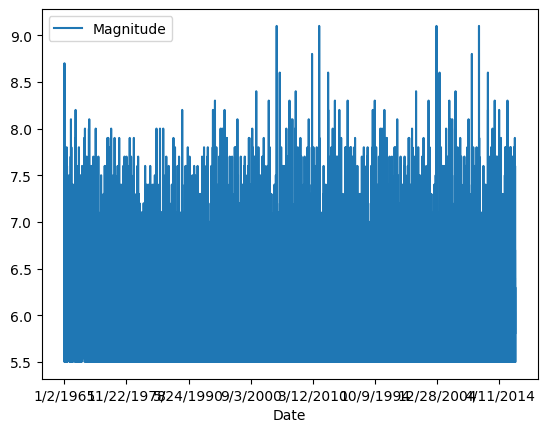

In [61]:
data.plot(x='Date', y='Magnitude', kind='line')
plt.show()

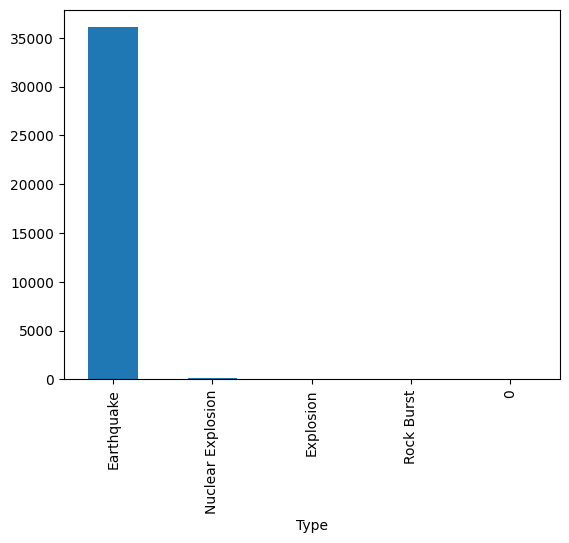

In [62]:
data['Type'].value_counts().plot(kind='bar')
plt.show()

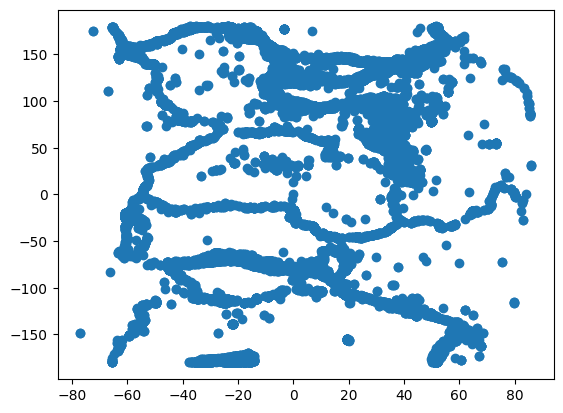

In [63]:
plt.scatter(data['Latitude'], data['Longitude'])
plt.show()

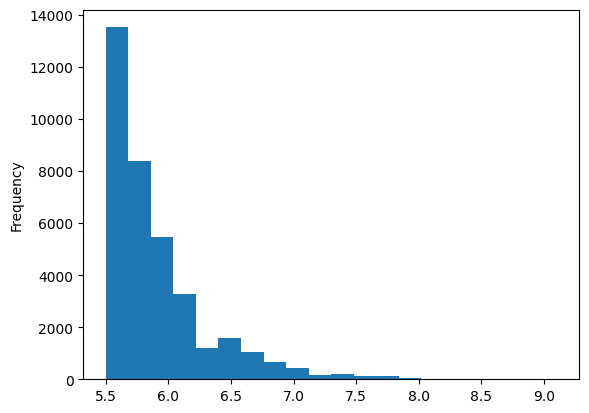

In [64]:
data['Magnitude'].plot(kind='hist', bins=20)
plt.show()

In [65]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

data['Date_formatted'] = data['Date'].dt.strftime('%Y-%m-%d')

yearly_mean_magnitude = data.resample('Y', on='Date')['Magnitude'].mean()
print("Yearly Mean Magnitude:")
print(yearly_mean_magnitude)

monthly_count = data.groupby([data['Date'].dt.year, data['Date'].dt.month])['Magnitude'].count()
print("\nMonthly Count of Earthquakes:")
print(monthly_count)

Yearly Mean Magnitude:
Date
1965-12-31    6.014159
1966-12-31    6.040470
1967-12-31    6.003922
1968-12-31    6.078525
1969-12-31    6.009350
1970-12-31    6.035768
1971-12-31    5.972539
1972-12-31    5.943814
1973-12-31    5.814065
1974-12-31    5.830332
1975-12-31    5.848881
1976-12-31    5.825842
1977-12-31    5.783765
1978-12-31    5.818537
1979-12-31    5.828371
1980-12-31    5.845690
1981-12-31    5.862773
1982-12-31    5.817630
1983-12-31    5.876733
1984-12-31    5.851701
1985-12-31    5.895495
1986-12-31    5.857093
1987-12-31    5.903564
1988-12-31    5.848875
1989-12-31    5.843333
1990-12-31    5.860625
1991-12-31    5.880395
1992-12-31    5.882702
1993-12-31    5.888841
1994-12-31    5.877500
1995-12-31    5.904822
1996-12-31    5.872089
1997-12-31    5.859868
1998-12-31    5.868814
1999-12-31    5.890605
2000-12-31    5.858228
2001-12-31    5.878330
2002-12-31    5.866216
2003-12-31    5.885732
2004-12-31    5.850911
2005-12-31    5.855347
2006-12-31    5.859646
2007-1